## HR Analytics Project- Understanding the Attrition in HR

- Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

- HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

- Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

- Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [10]:
df=pd.read_csv(r"C:\Users\rutuj\Downloads\ibm-hr-analytics-employee-attrition-performance\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [11]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [12]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


In [13]:
df.shape

(1470, 35)

- Data set has total 1470 rows and 35 columns

In [14]:
# Getting some information about Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [15]:
#Checking for null values 
df.isnull().sum().sum()

0

In [19]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [20]:
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

In [46]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [24]:
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,-0.014829,0.012648,-0.001251,-0.012944,-0.020359,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,-0.034730,-0.021222,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


#### Lets Check correlation using heatmap

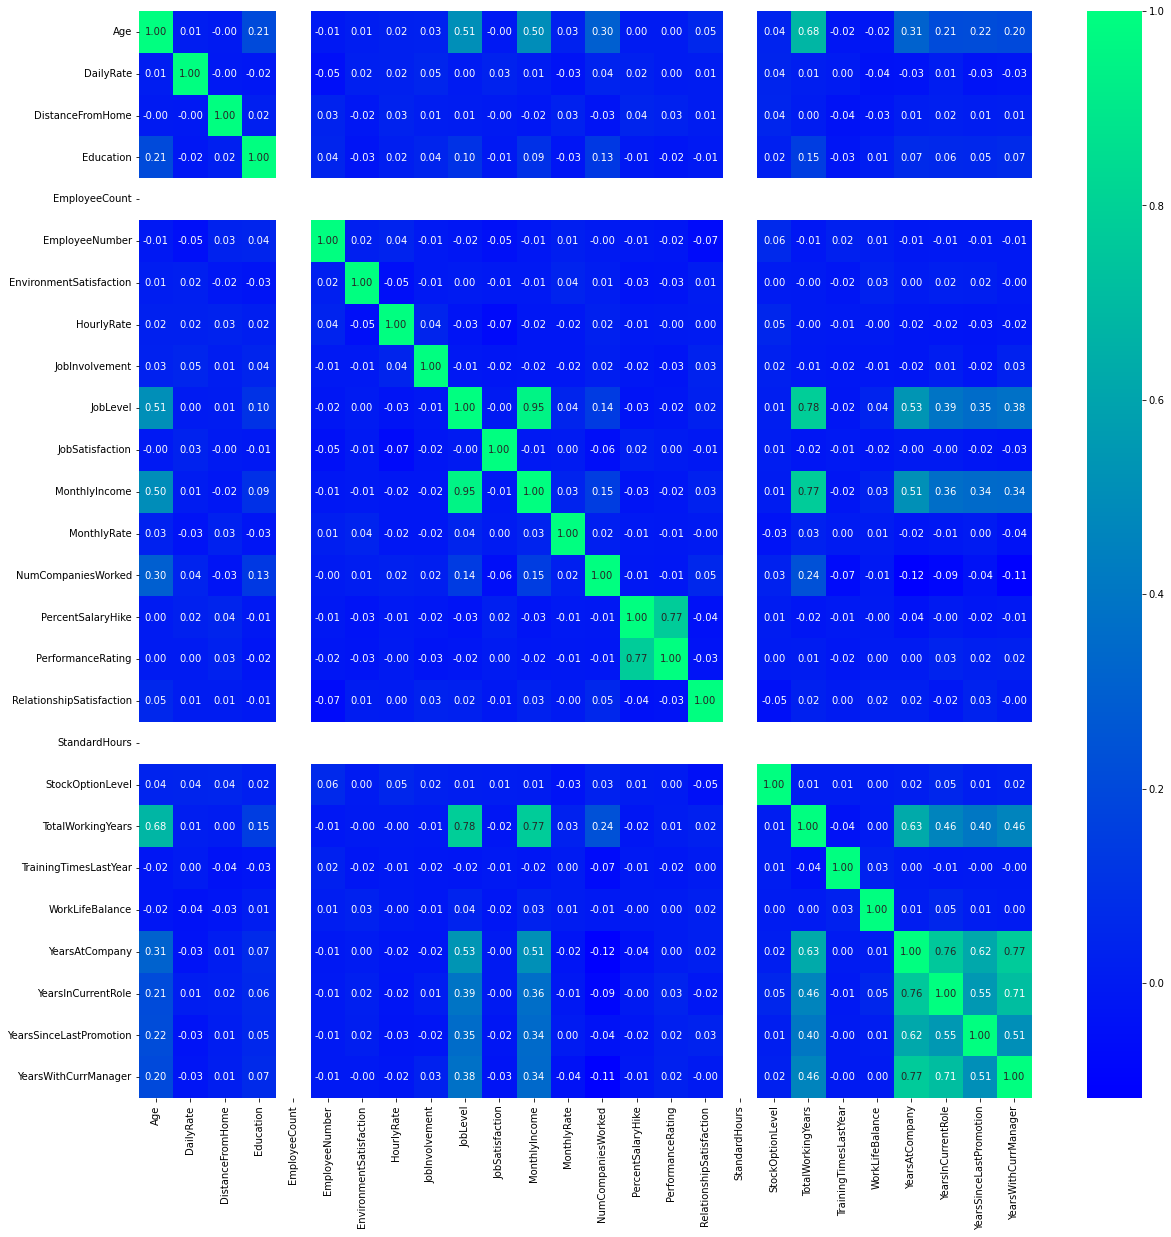

In [33]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='winter')
plt.show()

# Data Visualization

#### This is a Binary Classification Problem, so the Distribution of instances among the 2 classes, is visualized below:

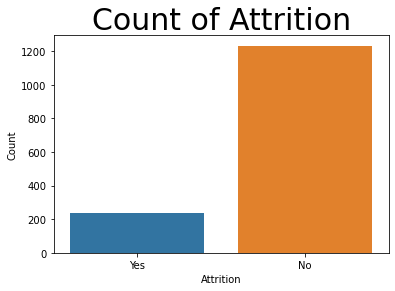

In [34]:
sns.countplot('Attrition', data=df)
plt.title('Count of Attrition', fontsize=30)
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

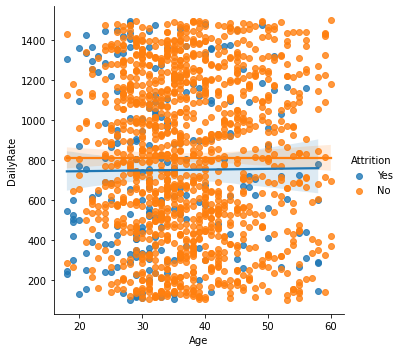

In [36]:
sns.lmplot(x = 'Age', y = 'DailyRate', hue = 'Attrition', data = df)

- The attrition rate is spreded throughout the age 20 to 60

#### Attrition w.r.t Age and Gender

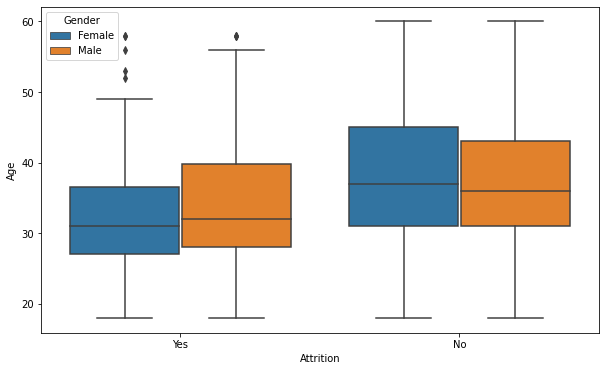

In [48]:
plt.figure(figsize=(10,6))
sns.boxplot('Attrition', 'Age', hue='Gender', data=df)
plt.xlabel('Attrition')
plt.show()

- From the above graph we can see that the amount of attrition is more for the Male employees ranging from age 29 to 41
- which is more than number of female employees age range 28 to 36

In [50]:
categorical_cols = [feature for feature in df.columns if df[feature].dtypes=='object']
df[categorical_cols].head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


- Total 9 columns has categorical data

In [45]:
numerical_cols = [feature for feature in df.columns if df[feature].dtypes!='object']
df[numerical_cols].head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2


####  Percentage of BusinessTravel of Employees

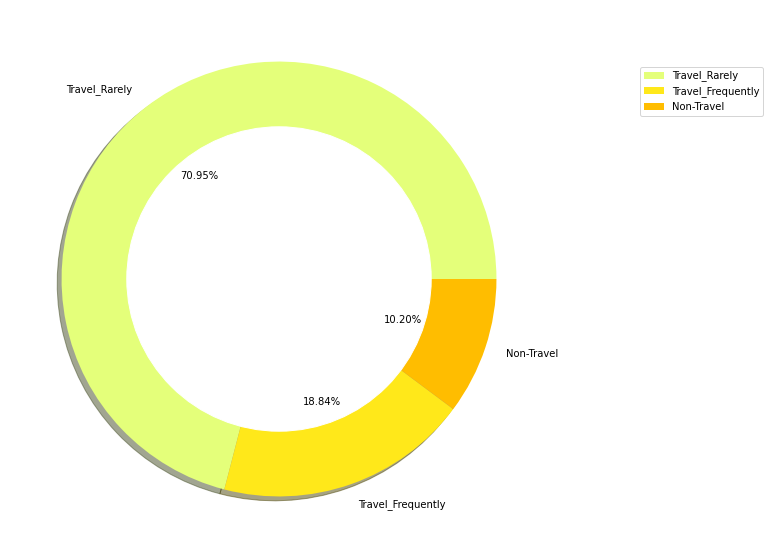

In [54]:
size = df['BusinessTravel'].value_counts()
labels = df['BusinessTravel'].unique()
colors = plt.cm.Wistia(np.linspace(0,1,5))

plt.figure(figsize=(10,10))
circle = plt.Circle((0,0), radius=0.7, color='White')
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
p = plt.gcf()
p.gca().add_artist(circle)
plt.legend(bbox_to_anchor=(0.5, 0., 0.9, 0.9));

- Large number of employees rarely travels which can be shown in above figure which is 70.95%
- 18.84% of employees frequently traves.
- and less which is 10.20 % employees never travels

#### Percentage of Employees in various Departments

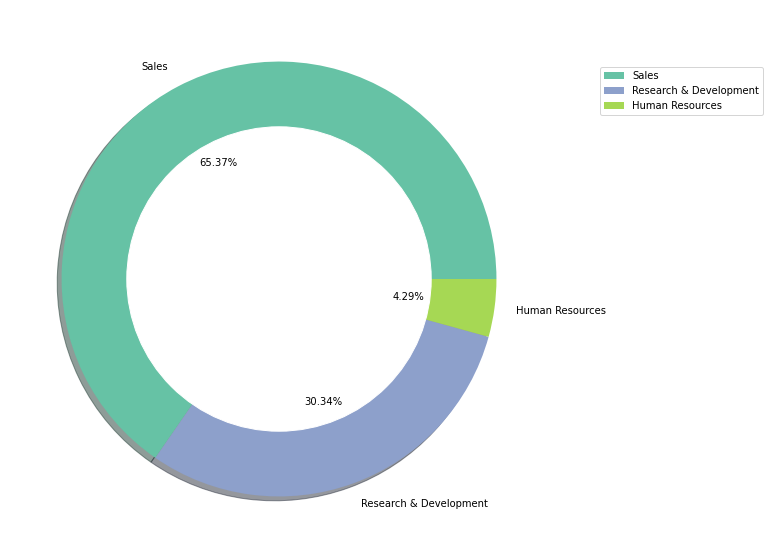

In [61]:
size = df['Department'].value_counts()
labels = df['Department'].unique()
colors = plt.cm.Set2(np.linspace(0,1,5))
plt.figure(figsize=(10,10))
circle = plt.Circle((0,0), radius=0.7, color='white')
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
p = plt.gcf()
p.gca().add_artist(circle)
plt.legend(bbox_to_anchor=(0.5, 0., 0.9, 0.9));

- There are 65.37% employees working in Sales Department which is very large.
- 30.34% employees working in R&D Department
- And very less that is 4.29% works in HR department

#### Percentage of Education Fields

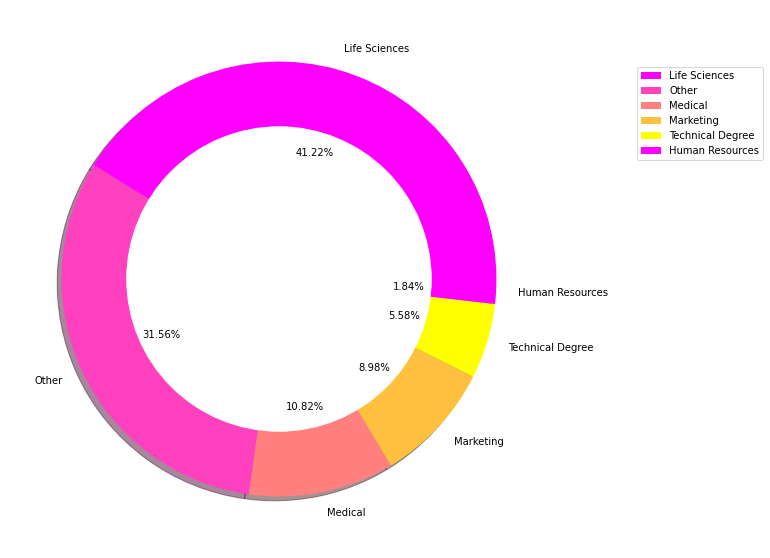

In [76]:
size = df['EducationField'].value_counts()
labels = df['EducationField'].unique()
colors = plt.cm.spring(np.linspace(0,1,5))
plt.figure(figsize=(10,10))
circle = plt.Circle((0,0), radius=0.7, color='white')
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
p = plt.gcf()
p.gca().add_artist(circle)
plt.legend(bbox_to_anchor=(0.5, 0., 0.9, 0.9));

- 41.22% Employees are from LifeScience feild
- 31.56% Employees are from Other feild
- 10.82% Employees are from Medical feild
- 8.98% Employees are from Marketing feild
- 5.58% Employees are from Technical feild
- 1.84% Employees are from HR feild

#### Percentage of Employees in various Job Roles

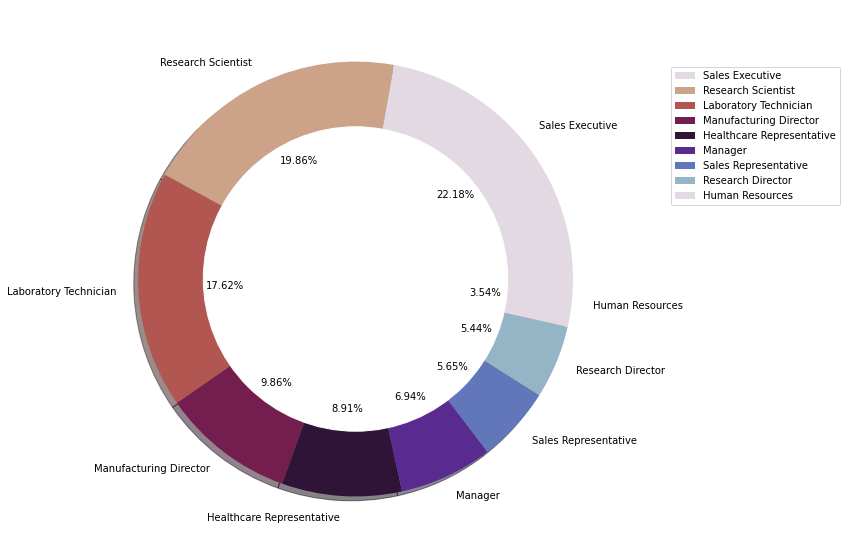

In [68]:
size = df['JobRole'].value_counts()
labels = df['JobRole'].unique()
colors = plt.cm.twilight_r(np.linspace(0,1,9))

plt.figure(figsize=(10,10))
circle = plt.Circle((0,0), radius=0.7, color='white')
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
p = plt.gcf()
p.gca().add_artist(circle)
plt.legend(bbox_to_anchor=(0.5, 0., 0.9, 0.9));

- 22.18% Employees are in Sales Exicutive post
- 19.86% Employees are in Research Scientist post
- 17.62% Employees are in Laboratory Technician post
- 9.86% Employees are in Manufacturing Director post
- 8.91% Employees are in HealthCare Representative post
- 6.94% Employees are in Manager post
- 5.65% Employees are in Sales Representative post
- 5.44% Employees are in Research Director post
- 3.54% Employees are in HR post

#### Count of Gender of Employees

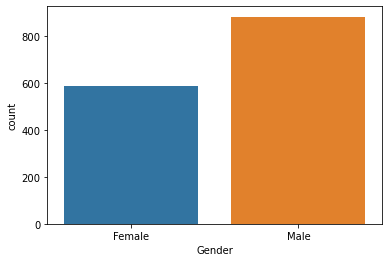

In [74]:
sns.countplot('Gender', data=df)
plt.xlabel('Gender')
plt.show()

- Number of male employees is around 950
-  Number of female employees is around 600

#### Count of Gender of Employees

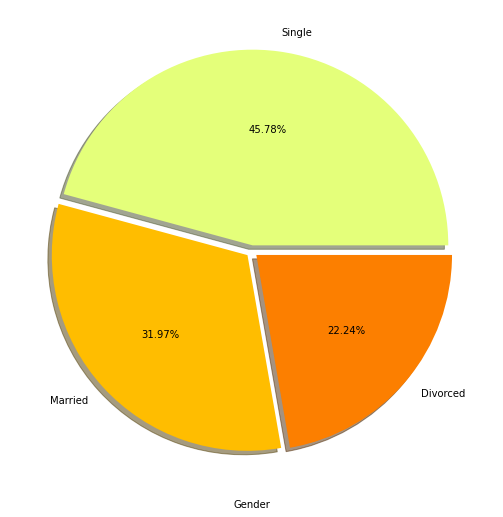

In [75]:
size=df['MaritalStatus'].value_counts()
labels=df['MaritalStatus'].unique()
colors=plt.cm.Wistia(np.linspace(0,1,3))
explode = [0.03, 0.03, 0.03]

plt.figure(figsize=(9,9))
plt.pie(size, colors=colors, labels=labels, explode=explode, autopct='%.2f%%', shadow=True)
plt.xlabel('Gender')
plt.show()

#### Distribution of Age of the Employees

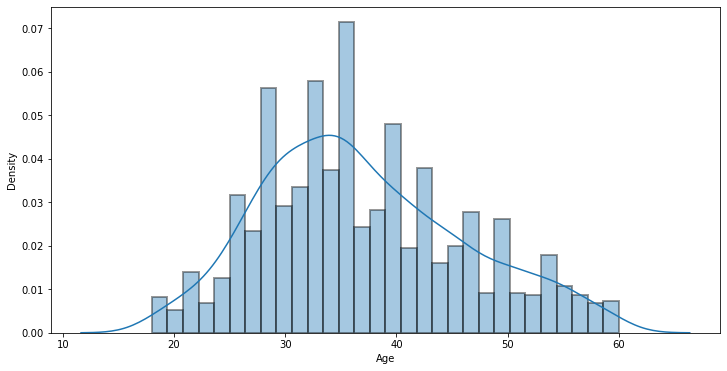

In [78]:
plt.figure(figsize=(12,6))
sns.distplot(df['Age'], bins=30, hist_kws=dict(edgecolor='black', linewidth=2))
plt.xlabel('Age')
plt.show()

#### Dependency of Age in determining Attrition

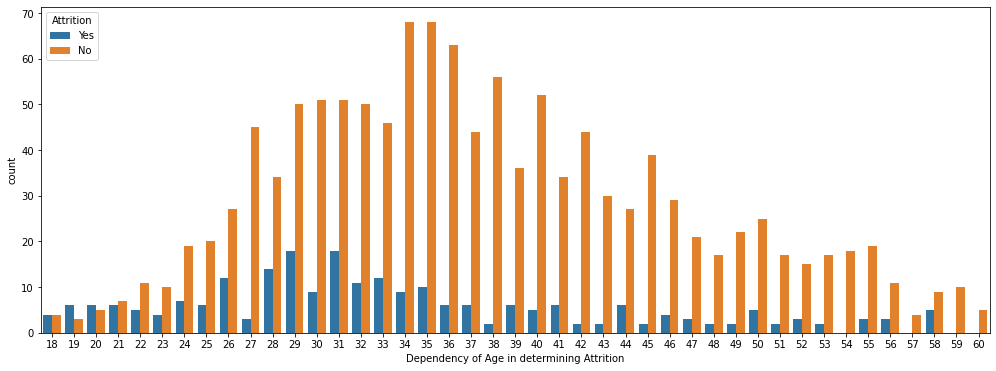

In [80]:
plt.figure(figsize=(17,6))
sns.countplot('Age', hue='Attrition', data=df)
plt.xlabel('Dependency of Age in determining Attrition')
plt.show()

#### Dependency of Business Travel in determining Attrition

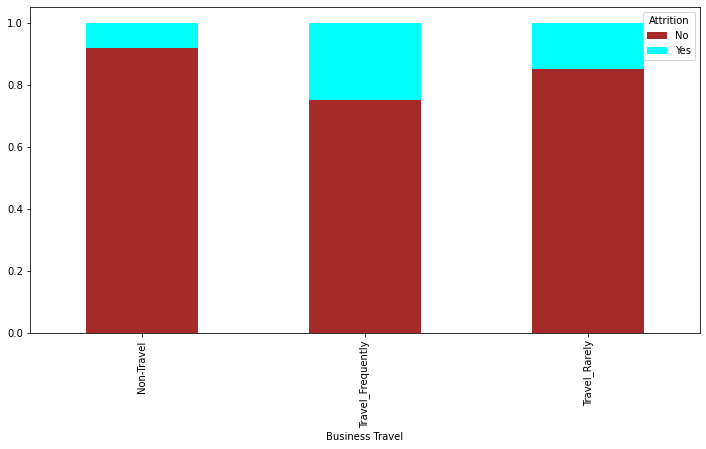

In [81]:
data=pd.crosstab(df['BusinessTravel'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['brown', 'cyan'],figsize=(12,6)) 
plt.xlabel('Business Travel')
plt.show()

#### Dependency of Department in determining Attrition

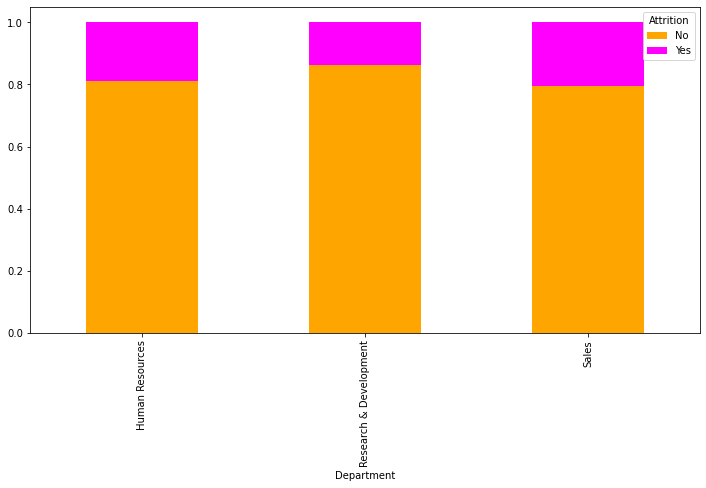

In [82]:
data=pd.crosstab(df['Department'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['orange', 'magenta'], figsize=(12,6))
plt.xlabel('Department')
plt.show()

#### Dependency of JobRole in determining Attrition

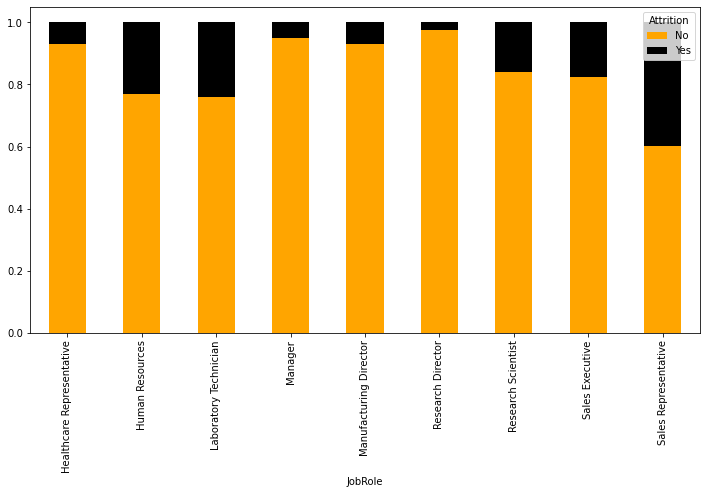

In [83]:
data=pd.crosstab(df['JobRole'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['orange', 'black'], figsize=(12,6))
plt.xlabel('JobRole')
plt.show()

#### Dependency of OverTime in determining Attrition

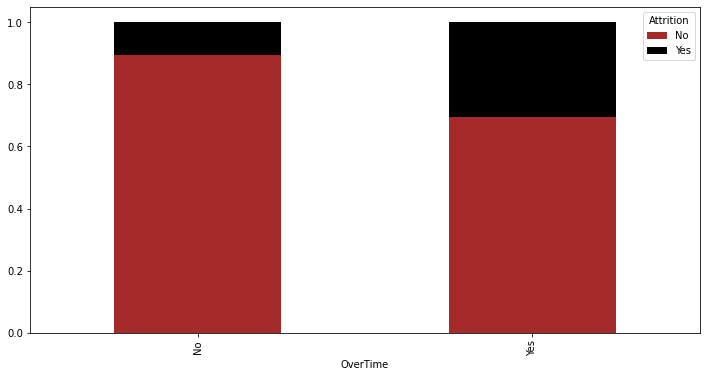

In [84]:
data=pd.crosstab(df['OverTime'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['brown', 'black'],figsize=(12,6))                                                
plt.xlabel('OverTime')
plt.show()

#### Dependency of RelationshipSatisfaction in determining Attrition

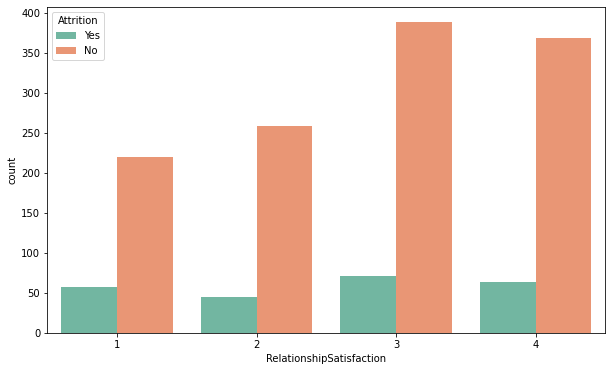

In [85]:
plt.figure(figsize=(10,6))
sns.countplot('RelationshipSatisfaction', hue='Attrition', data=df, palette='Set2')
plt.xlabel('RelationshipSatisfaction')
plt.show()

#### Dependency of YearsAtCompany in determining Attrition

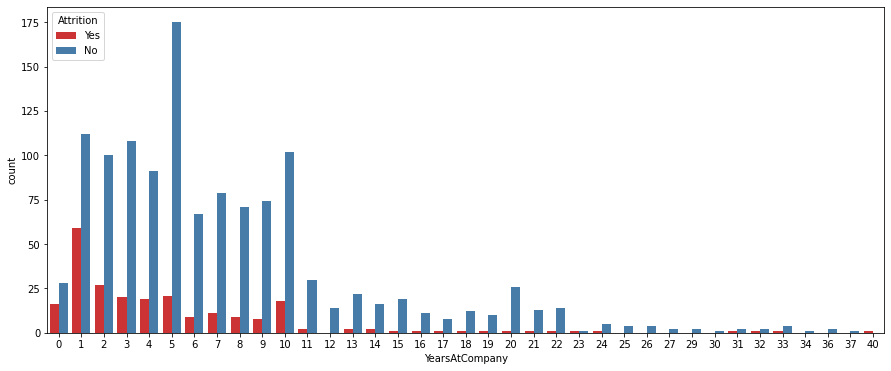

In [91]:
plt.figure(figsize=(15,6))
sns.countplot('YearsAtCompany', hue='Attrition', data=df, palette='Set1')
plt.xlabel('YearsAtCompany')
plt.show()

#### Dependency of YearsInCurrentRole in determining Attrition

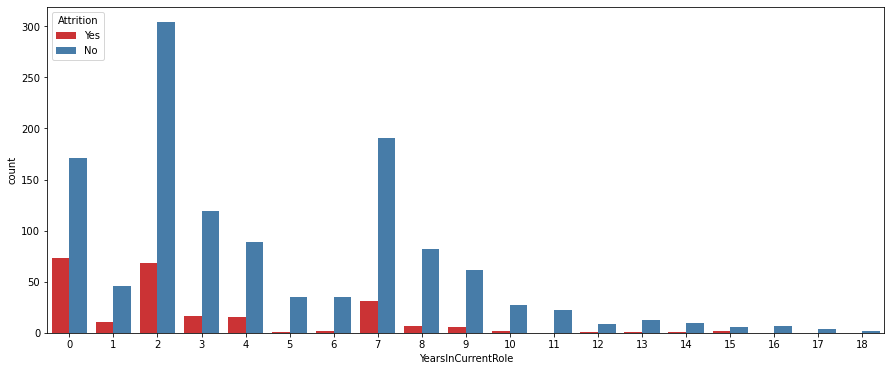

In [92]:
plt.figure(figsize=(15,6))
sns.countplot('YearsInCurrentRole', hue='Attrition', data=df, palette='Set1')
plt.xlabel('YearsInCurrentRole')
plt.show()

#### Dependency of YearsSinceLastPromotion in determining Attrition

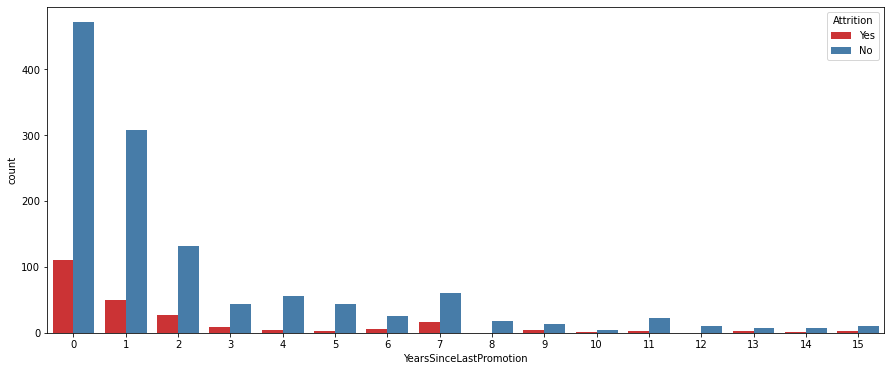

In [94]:
plt.figure(figsize=(15,6))
sns.countplot('YearsSinceLastPromotion', hue='Attrition', data=df, palette='Set1')
plt.xlabel('YearsSinceLastPromotion')
plt.show()

#### Dependency of YearsWithCurrManager in determining Attrition

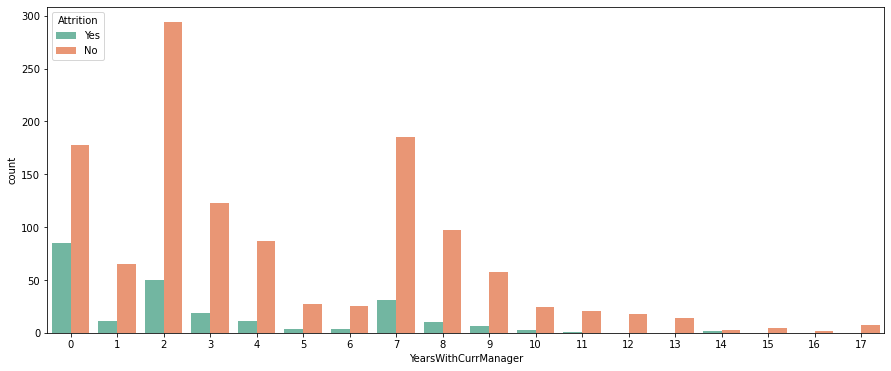

In [95]:
plt.figure(figsize=(15,6))
sns.countplot('YearsWithCurrManager', hue='Attrition', data=df, palette='Set2')
plt.xlabel('YearsWithCurrManager')
plt.show()

#### Preprocessing the data 


In the dataset there are 4 irrelevant columns, i.e:EmployeeCount, EmployeeNumber, Over18 and StandardHour. So, we have to remove these for more accuracy. 

In [98]:
df.drop('EmployeeCount', axis = 1, inplace = True)
df.drop('StandardHours', axis = 1, inplace = True)
df.drop('EmployeeNumber', axis = 1, inplace = True)
df.drop('Over18', axis = 1, inplace = True)
print(df.shape)

(1470, 31)


In [100]:
categorical_cols = [feature for feature in df.columns if df[feature].dtype=='object']
df[categorical_cols].head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


In [101]:
cols = ['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

df = pd.get_dummies(df, columns=cols, drop_first=True)

-  Seperate the data for train test split

In [107]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [102]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
cols = ['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

scaler = StandardScaler()
for col in cols:
    X_train[col] = scaler.fit_transform(X_train[col].values.reshape(-1 ,1))
    X_test[col] = scaler.fit_transform(X_test[col].values.reshape(-1 ,1))

### KNeighborsClassifier 

In [110]:
from sklearn.neighbors import KNeighborsClassifier 
neighbors = []  
cv_scores = []  
    
from sklearn.model_selection import cross_val_score  
# performimg 10 fold cross validation  
for k in range(1, 40, 2):  
    neighbors.append(k)  
    knn = KNeighborsClassifier(n_neighbors = k)  
    scores = cross_val_score(  
        knn, X_train, y_train, cv = 10, scoring = 'accuracy')  
    cv_scores.append(scores.mean()) 
error_rate = [1-x for x in cv_scores]  
    

In [111]:
#The best k
optimal_k = neighbors[error_rate.index(min(error_rate))]  
print('The optimal number of neighbors is % d ' % optimal_k)  
 

The optimal number of neighbors is  11 


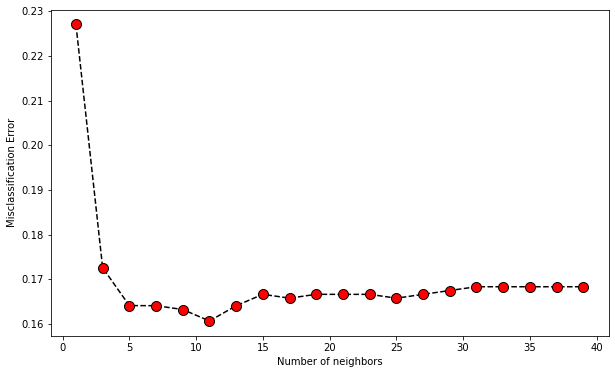

In [121]:
   
# plot misclassification error versus k  
plt.figure(figsize = (10, 6))  
plt.plot(range(1, 40, 2), error_rate, color ='black', linestyle ='dashed', marker ='o', 
         markerfacecolor ='red', markersize = 10) 
plt.xlabel('Number of neighbors')  
plt.ylabel('Misclassification Error')  
plt.show()

In [122]:
from sklearn.model_selection import cross_val_predict, cross_val_score 
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.metrics import confusion_matrix 

def print_score(clf, X_train, y_train, X_test, y_test, train = True): 
    if train: 
        print("Train Result:") 
        print("Classification Report: \n {}\n".format(classification_report( 
                y_train, clf.predict(X_train)))) 
        print("Confusion Matrix: \n {}\n".format(confusion_matrix( 
                y_train, clf.predict(X_train)))) 
  
        res = cross_val_score(clf, X_train, y_train,  
                              cv = 10, scoring ='accuracy') 
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res))) 
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res))) 
        print("accuracy score: {0:.4f}\n".format(accuracy_score( 
                y_train, clf.predict(X_train)))) 
    
                 
    elif train == False: 
        print("Test Result:") 
       
        print("Classification Report: \n {}\n".format( 
                classification_report(y_test, clf.predict(X_test)))) 
        print("Confusion Matrix: \n {}\n".format( 
                confusion_matrix(y_test, clf.predict(X_test))))  
        print("accuracy score: {0:.4f}\n".format( 
                accuracy_score(y_test, clf.predict(X_test)))) 
         

In [128]:
          
knn = KNeighborsClassifier(n_neighbors = 11) 
knn.fit(X_train, y_train) 
print_score(knn, X_train, y_train, X_test, y_test, train = True) 
print_score(knn, X_train, y_train, X_test, y_test, train = False) 

Train Result:
Classification Report: 
               precision    recall  f1-score   support

          No       0.84      1.00      0.91       978
         Yes       1.00      0.08      0.15       198

    accuracy                           0.85      1176
   macro avg       0.92      0.54      0.53      1176
weighted avg       0.87      0.85      0.79      1176


Confusion Matrix: 
 [[978   0]
 [182  16]]

Average Accuracy: 	 0.8393
Accuracy SD: 		 0.0057
accuracy score: 0.8452

Test Result:
Classification Report: 
               precision    recall  f1-score   support

          No       0.87      1.00      0.93       255
         Yes       0.00      0.00      0.00        39

    accuracy                           0.87       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.75      0.87      0.81       294


Confusion Matrix: 
 [[255   0]
 [ 39   0]]

accuracy score: 0.8673



### Random Forest Classifier

In [129]:
seed = 0   
rf_params = {
    'n_jobs': -1,
    'n_estimators': 1000,
#     'warm_start': True, 
    'max_features': 0.3,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}

In [130]:
rfc = RandomForestClassifier(**rf_params) 
rfc.fit(X_train, y_train) 
print_score(rfc, X_train, y_train, X_test, y_test, train = True) 
print_score(rfc, X_train, y_train, X_test, y_test, train = False) 

Train Result:
Classification Report: 
               precision    recall  f1-score   support

          No       0.85      1.00      0.92       978
         Yes       1.00      0.13      0.23       198

    accuracy                           0.85      1176
   macro avg       0.93      0.57      0.58      1176
weighted avg       0.88      0.85      0.80      1176


Confusion Matrix: 
 [[978   0]
 [172  26]]

Average Accuracy: 	 0.8419
Accuracy SD: 		 0.0113
accuracy score: 0.8537

Test Result:
Classification Report: 
               precision    recall  f1-score   support

          No       0.87      1.00      0.93       255
         Yes       1.00      0.05      0.10        39

    accuracy                           0.87       294
   macro avg       0.94      0.53      0.51       294
weighted avg       0.89      0.87      0.82       294


Confusion Matrix: 
 [[255   0]
 [ 37   2]]

accuracy score: 0.8741



### Gradient Boosting Classifier

In [133]:
gb_params ={
    'n_estimators': 1000,
    'max_features': 0.9,
    'learning_rate' : 0.25,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'subsample': 1,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}

In [134]:
gbc = GradientBoostingClassifier(**gb_params) 
gbc.fit(X_train, y_train) 
print_score(gbc, X_train, y_train, X_test, y_test, train = True) 
print_score(gbc, X_train, y_train, X_test, y_test, train = False)

Train Result:
Classification Report: 
               precision    recall  f1-score   support

          No       1.00      1.00      1.00       978
         Yes       1.00      1.00      1.00       198

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176


Confusion Matrix: 
 [[978   0]
 [  0 198]]

Average Accuracy: 	 0.8690
Accuracy SD: 		 0.0132
accuracy score: 1.0000

Test Result:
Classification Report: 
               precision    recall  f1-score   support

          No       0.91      0.95      0.93       255
         Yes       0.54      0.36      0.43        39

    accuracy                           0.87       294
   macro avg       0.72      0.66      0.68       294
weighted avg       0.86      0.87      0.86       294


Confusion Matrix: 
 [[243  12]
 [ 25  14]]

accuracy score: 0.8741



In [141]:
import pickle
filename = 'attrition.pkl'
pickle.dump(gbc,open(filename, 'wb'))

Text(0, 0.5, 'Features')

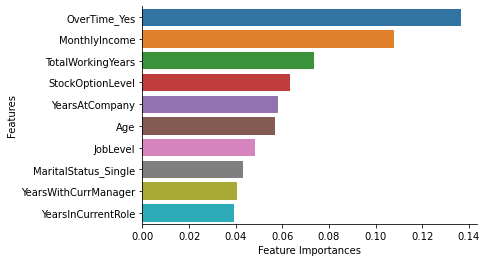

In [136]:
feature = rfc.feature_importances_
feature_importances = pd.Series(feature, index=X_train.columns).sort_values(ascending = False)
sns.barplot(x=feature_importances[0:10], y=feature_importances.index[0:10])
sns.despine()
plt.xlabel("Feature Importances")
plt.ylabel("Features")

- Top Reasons why Employees leave the Organization:
    -No Overtime, employees not having overtime are most likely to leave the organization. 
    -Monthly Income: As expected, Income is a huge factor as why employees leave the organization in search for a better salary.
